In [111]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
dataPath = 'data'
for file in os.listdir(dataPath):
    if file.endswith('.xlsx'):
        tempDF = pd.read_excel(dataPath+'/'+file)
        tempDF.to_csv(dataPath+'/'+os.path.splitext(file)[0]+'.csv', index = False)

In [113]:
mobiDF = pd.DataFrame()
for file in os.listdir(dataPath):
    if file.endswith('.csv'):
        tempDF = pd.read_csv(dataPath+'/'+file)
        mobiDF = mobiDF.append(tempDF)
mobiDF.reset_index(drop = True, inplace = True)

In [114]:
mobiDF

,Departure,Return,Account,Bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure battery voltage (mV),...,Departure slot,Return slot,Departure temperature (deg C),Return temperature (deg C),Departure temperature (C),Return temperature (C),Stopover duration,Manager,Number of bike stopovers,Return temperature (Â°C)
0,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00001,754.0,0048 Comox & Broughton,0002 Burrard Station,365 Day Founding Plus,1382.0,402,3715.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00001,754.0,0048 Comox & Broughton,0048 Comox & Broughton,365 Day Founding Plus,0.0,17,3797.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00002,517.0,0093 Chilco & Robson,0035 Coal Harbour Community Centre,365 Day Founding Standard,1960.0,1015,3645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00003,231.0,0071 14th & Granville,0211 14th & Alder,365 Corporate Plus,624.0,194,3650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00004,1302.0,0187 Bute & Davie,0079 Nelson & Richards,365 Day Founding Plus,1756.0,571,3686.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908475,2021-04-01 0:00,2021-04-01 1:00,NaN,1272.0,0278 15th & Victoria (Trout Lake),0228 Keefer & Hawks,365 Day Pass Plus SALE,3904.0,1197,3752.0,...,NaN,NaN,NaN,NaN,7.0,10.0,NaN,NaN,0.0,NaN
2908476,2021-04-01 0:00,2021-04-01 0:00,NaN,875.0,0126 Thurlow & Pendrell,0138 Richards & Helmcken,30 Day Pass,971.0,361,3997.0,...,NaN,NaN,NaN,NaN,11.0,13.0,NaN,NaN,0.0,NaN
2908477,2021-04-01 0:00,2021-04-01 0:00,NaN,380.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1502.0,463,3586.0,...,NaN,NaN,NaN,NaN,9.0,11.0,NaN,NaN,0.0,NaN
2908478,2021-04-01 0:00,2021-04-01 0:00,NaN,668.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1462.0,485,3495.0,...,NaN,NaN,NaN,NaN,9.0,11.0,NaN,NaN,0.0,NaN


In [115]:
def nullPercent(df):
    # Create a temp dataframe for null vlaue totals
    nullTotalDF = pd.DataFrame(df.isnull().sum()).reset_index()
    nullTotalDF.columns = ['Category', 'Total Null']
    # Create a temp dataframe for null value percentages
    nullPercentDF = pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100,2)).reset_index()
    nullPercentDF.columns = ['Category', 'Percent Null (%)']
    # Merge temporary null value datasets and sort by null percentage
    nullDF = pd.merge(nullTotalDF, nullPercentDF, on = 'Category')
    display(nullDF.sort_values('Percent Null (%)', ascending = False))

In [116]:
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
26,Return temperature (Â°C),2876218,98.89
20,Return temperature (deg C),2869232,98.65
19,Departure temperature (deg C),2869232,98.65
15,Formula,2862692,98.43
23,Stopover duration,2845627,97.84
24,Manager,2782010,95.65
17,Departure slot,2719422,93.50
18,Return slot,2719155,93.49
25,Number of bike stopovers,2619601,90.07
16,Membership Type,2559468,88.00


In [117]:
mobiDF = pd.DataFrame()
for file in os.listdir(dataPath):
    if file.endswith('.csv'):
        tempDF = pd.read_csv(dataPath+'/'+file)
        for c in tempDF.columns:
            if c == 'Return temperature (Â°C)':
                tempDF.rename(columns = {'Return temperature (Â°C)':'Return temperature (°C)'}, inplace = True)
            elif c == 'Formula':
                tempDF.rename(columns = {'Formula':'Membership type'}, inplace = True)
            elif c == 'Return temperature (deg C)':
                tempDF.rename(columns = {'Return temperature (deg C)':'Return temperature (°C)'}, inplace = True)
            elif c == 'Departure temperature (deg C)':
                tempDF.rename(columns = {'Departure temperature (deg C)':'Departure temperature (°C)'}, inplace = True)
            elif c == 'Membership Type':
                tempDF.rename(columns = {'Membership Type':'Membership type'}, inplace = True)
            elif c == 'Departure temperature (C)':
                tempDF.rename(columns = {'Departure temperature (C)':'Departure temperature (°C)'}, inplace = True)
            elif c == 'Return temperature (C)':
                tempDF.rename(columns = {'Return temperature (C)':'Return temperature (°C)'}, inplace = True)
            elif c == 'Number of bike stopovers':
                tempDF.rename(columns = {'Number of bike stopovers':'Number of stopovers'}, inplace = True)
            elif c == 'Stopover duration':
                tempDF.rename(columns = {'Stopover duration':'Stopover duration (sec.)'}, inplace = True)
        mobiDF = mobiDF.append(tempDF)
mobiDF.reset_index(drop = True, inplace = True)

In [118]:
mobiDF['Number of stopovers'].value_counts()

0     2823156
1       65130
2       11531
3        3576
4        2019
5        1423
6         900
7         459
8         170
9          72
10         22
11         12
13          5
12          3
21          1
14          1
Name: Number of stopovers, dtype: int64

In [119]:
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
17,Manager,2782010,95.65
15,Departure slot,2719422,93.50
16,Return slot,2719155,93.49
2,Account,2335036,80.28
10,Return battery voltage (mV),53521,1.84
9,Departure battery voltage (mV),53521,1.84
3,Bike,1190,0.04
6,Membership type,498,0.02
1,Return,153,0.01
5,Return station,253,0.01


In [120]:
mobiDF.drop(columns = ['Manager', 'Departure slot', 'Return slot', 'Account', 'Departure battery voltage (mV)', 'Return battery voltage (mV)', 'Number of stopovers', 'Stopover duration (sec.)'], inplace = True)

In [121]:
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
2,Bike,1190,0.04
5,Membership type,498,0.02
1,Return,153,0.01
4,Return station,253,0.01
0,Departure,0,0.00
3,Departure station,9,0.00
6,Covered distance (m),0,0.00
7,Duration (sec.),0,0.00
8,Departure temperature (°C),0,0.00
9,Return temperature (°C),0,0.00


In [122]:
mobiDF.dropna(inplace = True)

In [123]:
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
0,Departure,0,0.0
1,Return,0,0.0
2,Bike,0,0.0
3,Departure station,0,0.0
4,Return station,0,0.0
5,Membership type,0,0.0
6,Covered distance (m),0,0.0
7,Duration (sec.),0,0.0
8,Departure temperature (°C),0,0.0
9,Return temperature (°C),0,0.0


In [124]:
mobiDF.columns = mobiDF.columns.str.replace(' ','_',)

In [125]:
mobiDF['Departure'] = pd.to_datetime(mobiDF['Departure'], errors = 'coerce').dt.strftime('%m/%d/%y %H:%M')
mobiDF['Return'] = pd.to_datetime(mobiDF['Return'], errors = 'coerce').dt.strftime('%m/%d/%y %H:%M')

In [127]:
mobiDF

,Departure,Return,Bike,Departure_station,Return_station,Membership_type,Covered_distance_(m),Duration_(sec.),Departure_temperature_(°C),Return_temperature_(°C)
0,01/01/18 00:00,01/01/18 00:00,754.0,0048 Comox & Broughton,0002 Burrard Station,365 Day Founding Plus,1382.0,402,2,4
1,01/01/18 00:00,01/01/18 00:00,754.0,0048 Comox & Broughton,0048 Comox & Broughton,365 Day Founding Plus,0.0,17,2,1
2,01/01/18 00:00,01/01/18 00:00,517.0,0093 Chilco & Robson,0035 Coal Harbour Community Centre,365 Day Founding Standard,1960.0,1015,0,1
3,01/01/18 00:00,01/01/18 00:00,231.0,0071 14th & Granville,0211 14th & Alder,365 Corporate Plus,624.0,194,0,1
4,01/01/18 00:00,01/01/18 00:00,1302.0,0187 Bute & Davie,0079 Nelson & Richards,365 Day Founding Plus,1756.0,571,2,3
...,...,...,...,...,...,...,...,...,...,...
2908475,04/01/21 00:00,04/01/21 01:00,1272.0,0278 15th & Victoria (Trout Lake),0228 Keefer & Hawks,365 Day Pass Plus SALE,3904.0,1197,7,10
2908476,04/01/21 00:00,04/01/21 00:00,875.0,0126 Thurlow & Pendrell,0138 Richards & Helmcken,30 Day Pass,971.0,361,11,13
2908477,04/01/21 00:00,04/01/21 00:00,380.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1502.0,463,9,11
2908478,04/01/21 00:00,04/01/21 00:00,668.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1462.0,485,9,11


In [128]:
mobiDF.drop(mobiDF[mobiDF.Departure > '04/30/21 23:00'].index, inplace = True)

In [129]:
mobiDF[['Departure_ID','Departure_Station']] = mobiDF.Departure_station.str.split(' ', 1, expand = True)
mobiDF[['Return_ID','Return_Station']] = mobiDF.Return_station.str.split(' ', 1, expand = True)
mobiDF.drop('Departure_station', axis = 1, inplace = True)
mobiDF.drop('Return_station', axis = 1, inplace = True)

In [130]:
mobiDF['Membership_type'].replace(['24 Hour', 'Archived Day', 'Single Trip Pass', 'Archived Single Trip Pass', 'HOPR Pass'], 'Day Pass', inplace = True)
mobiDF['Membership_type'].replace(['30 Day Pass', 'Archived Monthly Standard', '90 Day', 'Archived Monthly Plus', 'Archived Monthly Basic', 'Archived 90 Day'], 'Monthly Pass', inplace = True)
mobiDF['Membership_type'].replace(['365 Standard', '365 Plus', '365 Day Founding Plus', '365 Day Founding Standard', '365 Corporate Plus', '365 Day Pass Standard SALE', '365 Day Pass Plus SALE', '365 Corporate Standard', 'Vancity Community Pass', 'Archived Founding Standard', '365 Corporate Plus Renewal', 'Archived Founding Plus', 'VIP', '365 Corporate Standard Renewal', 'Community Pass', 'Shared Mobility Pass'], 'Annual Pass', inplace = True)

In [131]:
mobiDF['Membership_type'].value_counts()

Annual Pass     431229
Day Pass        115904
Monthly Pass    113376
Name: Membership_type, dtype: int64

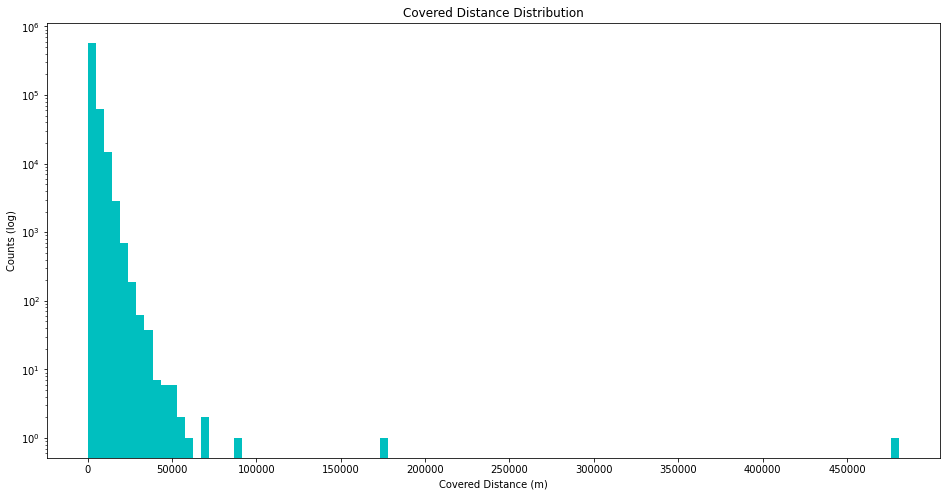

In [132]:
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Covered_distance_(m)'], log = True, bins = 100, color = 'c')
plt.title('Covered Distance Distribution')
plt.xlabel('Covered Distance (m)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,int(max(mobiDF['Covered_distance_(m)'])),50000))
plt.show()

In [133]:
q95 = mobiDF['Covered_distance_(m)'].quantile(0.95)
mobiDF.drop(mobiDF[mobiDF['Covered_distance_(m)'] > q95].index, inplace = True)

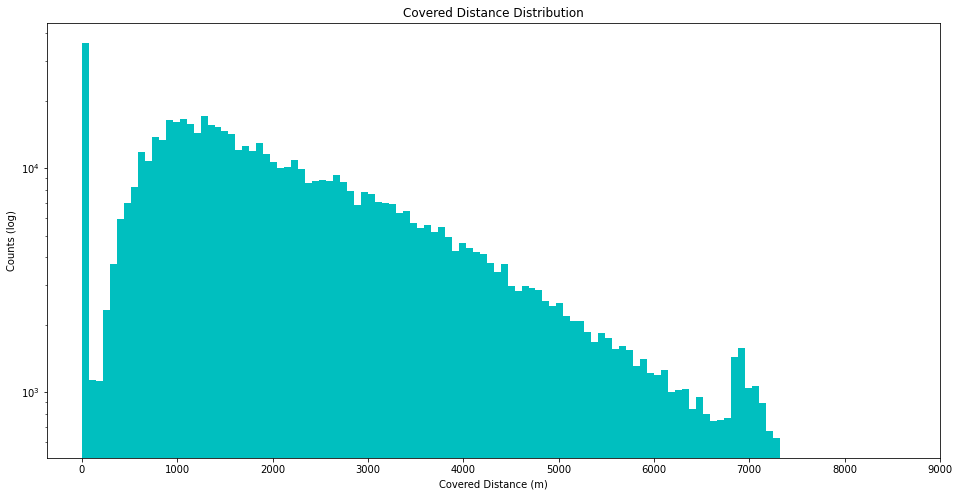

In [134]:
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Covered_distance_(m)'], log = True, bins = 100, color = 'c')
plt.title('Covered Distance Distribution')
plt.xlabel('Covered Distance (m)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,10000,1000))
plt.show()

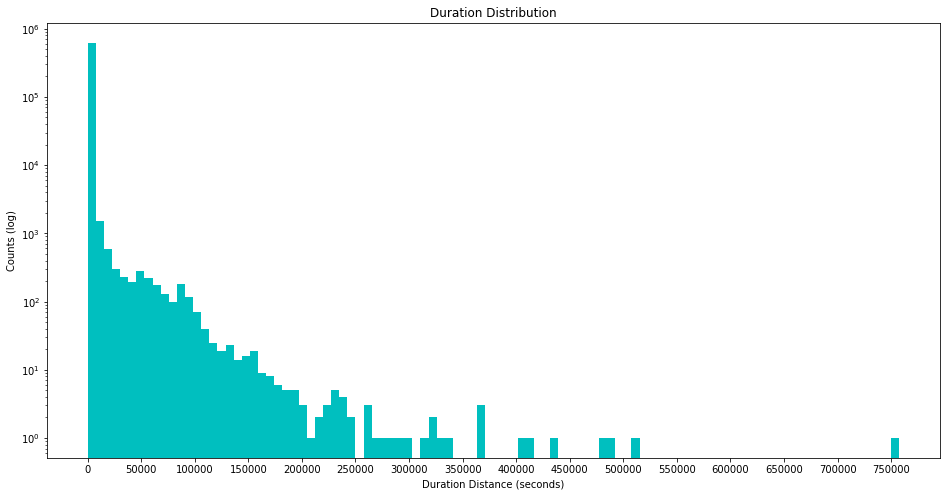

In [135]:
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Duration_(sec.)'], log = True, bins = 100, color = 'c')
plt.title('Duration Distribution')
plt.xlabel('Duration Distance (seconds)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,int(max(mobiDF['Duration_(sec.)'])),50000))
plt.show()

In [136]:
q95 = mobiDF['Duration_(sec.)'].quantile(0.95)
mobiDF.drop(mobiDF[mobiDF['Duration_(sec.)'] > q95].index, inplace = True)

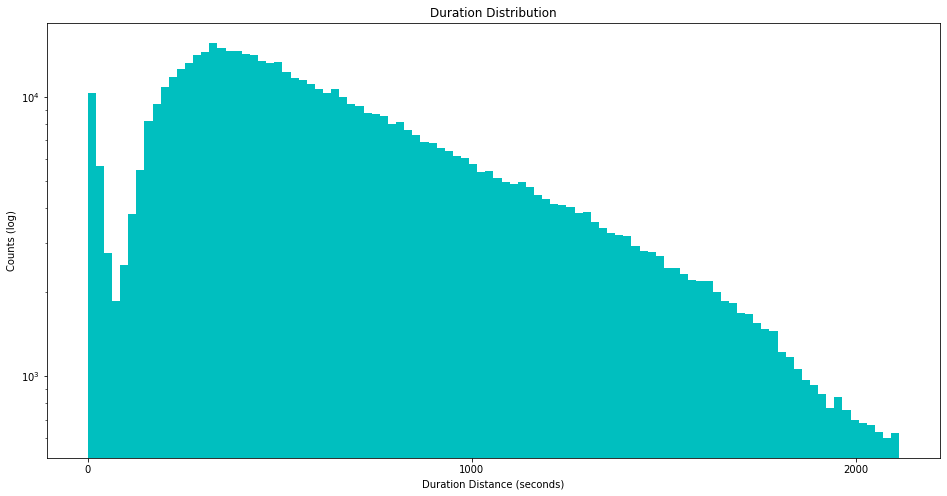

In [137]:
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Duration_(sec.)'], log = True, bins = 100, color = 'c')
plt.title('Duration Distribution')
plt.xlabel('Duration Distance (seconds)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,int(max(mobiDF['Duration_(sec.)'])),1000))
plt.show()

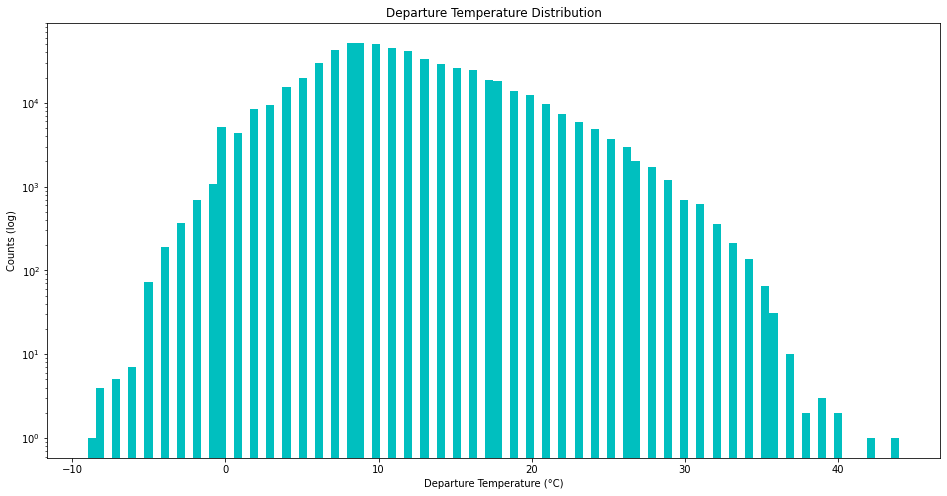

In [138]:
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Departure_temperature_(°C)'], log = True, bins = 100, color = 'c')
plt.title('Departure Temperature Distribution')
plt.xlabel('Departure Temperature (°C)')
plt.ylabel('Counts (log)')
plt.show()

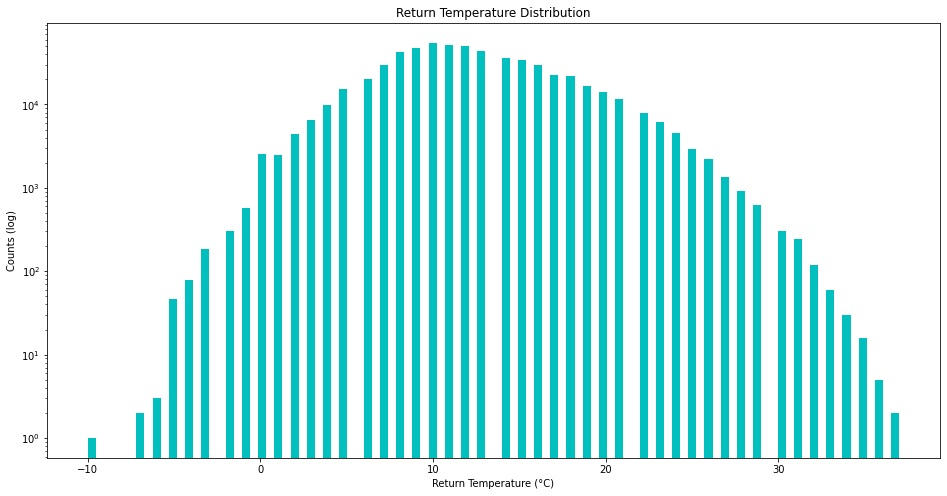

In [139]:
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Return_temperature_(°C)'], log = True, bins = 100, color = 'c')
plt.title('Return Temperature Distribution')
plt.xlabel('Return Temperature (°C)')
plt.ylabel('Counts (log)')
plt.show()

In [140]:
mobiDF.to_csv('mobiSystemDataMaster.csv', index = False)